<a href="https://colab.research.google.com/github/Wanita-8943/multivariate/blob/main/Chapter_5_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/community/tutorials/introduction-factor-analysis

In [4]:
import pandas as pd

In [5]:
BFI_data = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/psych/bfi.csv')
BFI_data.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


## Factor Analysis'

## Assumptions:

ในข้อมูล mltivariate ที่มีตัวแปร observe veriables จำนวน n ตัว 

 มีตัวแปร Factors (Latent Variables) จำนวน k ตัว ที่สามารถอธิบายข้อมูลทั้งหมดได้ 
 
 โดย k < n

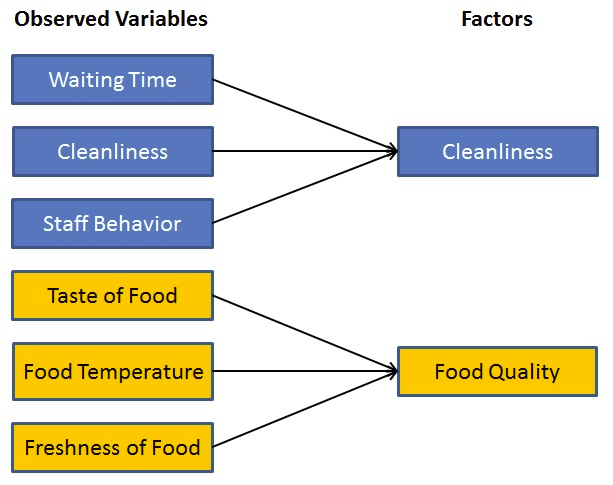

### Assumptions ในการทำ Factor Analysis : 

* There are no outliers in data. ห้ามมี outliers ในข้อมูลของเรา
* Sample size should be greater than the factor. จำนวน data ต้องมากกว่า Factor
* There should not be perfect **multicollinearity**.  ต้องไม่มี multicollinearity เพราะค่าจะเป็น1 กราฟเป็นเส้นตรง
* There should not be **homoscedasticity** between the variable .

### การทำ Factor Analysis :

In [6]:
# Import required libraries
from factor_analyzer import FactorAnalyzer #นำเข้า,ใช้ทำ FactorAnalyzer 
import matplotlib.pyplot as plt # plot กราฟ

ModuleNotFoundError: ignored

### แก้ error ``ModuleNotFoundError: No module named 'factor_analyzer'``โดย 

https://stackoverflow.com/questions/47973216/cannot-import-factoranalyzer-from-module-factor-analyzer-0-2-2/58283301

### วิธี install package อื่นๆ

In [7]:
!pip install factor_analyzer

     |████████████████████████████████| 40kB 3.0MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp37-none-any.whl size=40383 sha256=d74cb9d304f8ac1895ca21015b2069c548e8ca9a064cd2db60e2160ddd118bd0
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [8]:
from factor_analyzer import FactorAnalyzer 
import matplotlib.pyplot as plt # = from matplotlib import pyplot as plt  เหมือนกัน

## Quiz5

In [9]:
BFI_data.shape

(2800, 29)

In [10]:
BFI_data_dropped = BFI_data.iloc[:,1:26]# หรือใช้ [:,1:-3] -1คือตัวสุดท้าย
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [11]:
BFI_data_dropped = BFI_data_dropped.dropna()

In [12]:
BFI_data_dropped.shape

(2436, 25)

### Bartlett’s test

In [13]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity# import ฟังก์ชันที่เราใช้งาน
chi_square_value,p_value = calculate_bartlett_sphericity(BFI_data_dropped)
chi_square_value, p_value #p_value=0 คือไม่มี multicollinearity และ homoscedasticity
#เทสครั้งที่ 1

(18170.966350869243, 0.0)

### Kaiser-Meyer-Olkin (KMO) Test 

ถ้า Kaiser-Meyer-Olkin (KMO) Test มีค่ามากกว่า 0.6 แปลว่าข้อมูลเหมาะสมที่จะนำมาทำ Factor Analysis

In [14]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(BFI_data_dropped)
kmo_model
#เทสครั้งที่2 ถ้าค่า <0.6 จะไม่สามารถนำมาทำต่อได้

0.8485397221949221

### Factor Analysis

### Import

In [15]:
from factor_analyzer import FactorAnalyzer 

### Define

In [16]:
fa = FactorAnalyzer(n_factors=20)

### Fit_transform

In [17]:
data_fa = fa.fit_transform(BFI_data_dropped)

In [18]:
data_fa.shape

(2436, 20)

### วิธีตัดสินว่าเราจะเหลือกี่ dimension (มีfactorทั้งหมดกี่ตัว)

In [19]:
ev, v = fa.get_eigenvalues()

### ใช้ eigen values

In [20]:
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

### scree plot

ต้องการนำเส้น1เส้นมาตัด

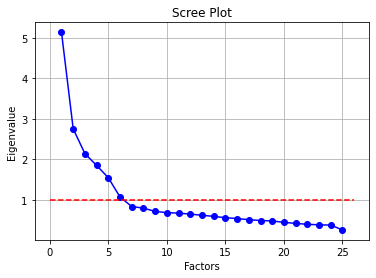

In [21]:
#plt.scatter(range(1,BFI_data_dropped.shape[1]+1),ev)
plt.plot(range(1,BFI_data_dropped.shape[1]+1),ev,'bo-')
plt.plot([0,BFI_data_dropped.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [22]:
data_fa[:,:6]

array([[-0.89749661, -0.12809666, -1.22649076,  1.08665889,  0.42476701,
         0.03981611],
       [ 0.33679356, -0.15018138, -0.04332274, -0.10339328,  0.29665648,
        -1.11019718],
       [-0.24521029,  0.80409961,  0.39343377, -0.30106518,  0.82703928,
        -0.2982022 ],
       ...,
       [ 0.38724631, -0.02183587,  1.19616826, -1.19357208,  0.79669501,
        -0.95295109],
       [-0.75695976,  0.94984758,  1.24363484, -1.15230215,  2.2534133 ,
        -1.0218667 ],
       [-2.35583952, -1.49829856,  0.49436981, -1.64734311,  0.94742323,
         0.43462495]])

รัน Factor Analysis อีกรอบ ด้วย pareeters จำนวน factor เท่ากับ 6

In [23]:
from factor_analyzer import FactorAnalyzer
fa2 = FactorAnalyzer(n_factors=6)
data_fa = fa2.fit_transform(BFI_data_dropped)

In [24]:
fa.loadings_.shape

(25, 20)

Plot factor loadings

In [25]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

matrix plot

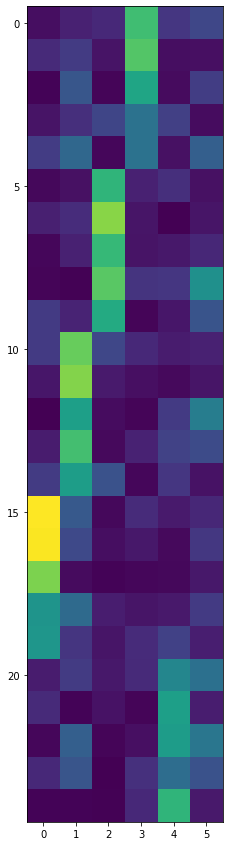

In [26]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(fa2.loadings_)) #ค่ามาก เป็นสีสว่าง  ส่วนค่าน้อย เป็นสีเข้ม

กราฟแท่ง

In [27]:
BFI_data_dropped.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')

<BarContainer object of 25 artists>

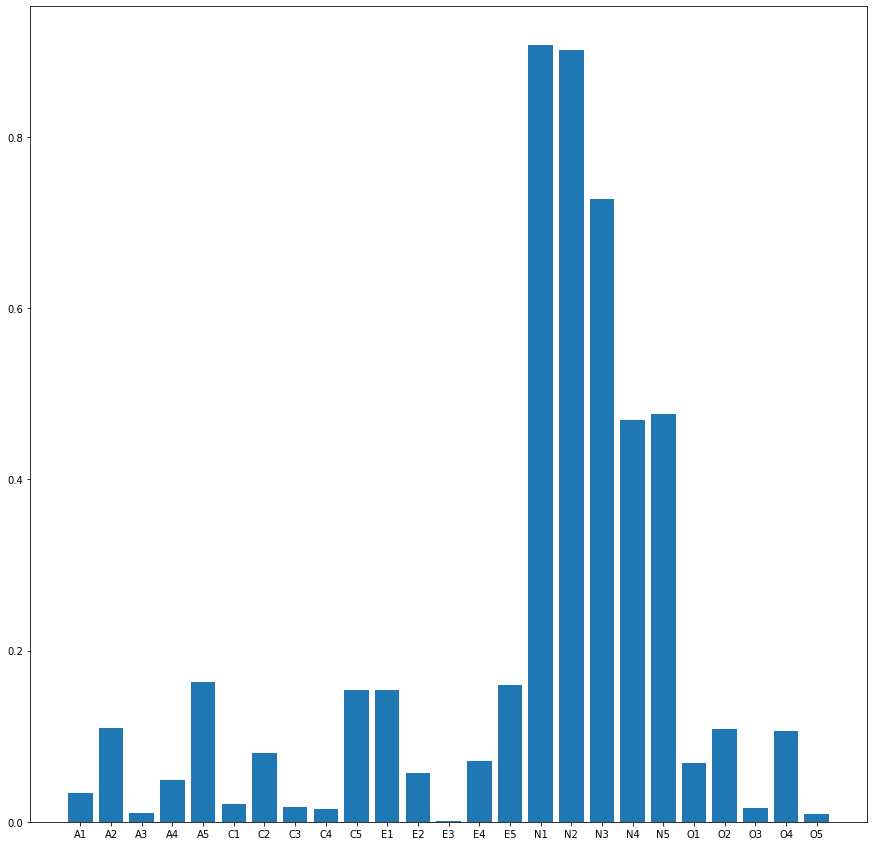

In [28]:
plt.bar(range(25),np.absolute(fa2.loadings_[:,0]),tick_label=BFI_data_dropped.columns)

#Exam 3

ทำ Factor Analysis ข้อมูล Fifa 2018 https://drive.google.com/file/d/1UORRKWMb8GCN455eJE_n9MvBHupnSVwv/view?usp=sharing

In [29]:
import pandas as pd


In [31]:
FIFA_data = pd.read_csv('/content/FIFA 2018 Statistics.csv')
FIFA_data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


วิธี install package อื่นๆ

In [32]:
!pip install factor_analyzer 
import matplotlib.pyplot as plt

In [33]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [34]:
FIFA_data.shape #ตรวจสอบขนาดของข้อมูล


(128, 27)

In [35]:
FIFA_data_dropped = FIFA_data.iloc[:,3:-7] 
FIFA_data_dropped

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0
124,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0
125,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0
126,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0


In [37]:
FIFA_data_dropped = FIFA_data_dropped.dropna()

In [39]:
FIFA_data_dropped.shape

(128, 17)

In [41]:
#ไม่ควรมี กราฟเป็นเส้นตรง ค่า correlation = 1 ถ้ามีคือซ้ำต้องตัด data ออก
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value = calculate_bartlett_sphericity(FIFA_data_dropped)

chi_square_value, p_value  #ค่าที่คำนวณได้เท่ากับ  2.713580160466225e-189

(1299.3697851171412, 2.713580160466225e-189)

##Kaiser-Meyer-Olkin (KMO) Test

ถ้าค่า KMO model มีค่ามากกว่า 0.6 แปลว่าข้อมูลเหมาะสมที่นำไปทำ Factor Analysis



In [42]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(FIFA_data_dropped)
kmo_model #ข้อมูลน้อยกว่า 0.6 ไม่เหมาะสมที่นำไปทำ Factor Analysis แต่ข้อมูลที่ได้เท่ากับ 0.559 หรือ ประมาณ 0.6

0.5594556344508279

Import

In [44]:
from factor_analyzer import FactorAnalyzer # นำเข้าฟังก์ชั่น

Define



In [53]:
fa = FactorAnalyzer(n_factors=16) # กำหนดค่า factors ให้มากที่สุด

In [57]:
data_fa = fa.fit_transform(FIFA_data_dropped)

In [58]:
data_fa.shape

(128, 16)

วิธีตัดสินว่าเราจะเหลือกี่ dimension (มีfactorทั้งหมดกี่ตัว)



In [59]:
ev, v = fa.get_eigenvalues()

In [60]:
ev #ใช้ eigen values ให้เลือก eigen values ที่มมีค่ามากกว่า 1

array([4.93533676, 1.66110682, 1.45898601, 1.31857945, 1.27991548,
       1.1607222 , 0.89822418, 0.80740568, 0.78874612, 0.65948826,
       0.56563441, 0.48116939, 0.38549929, 0.29659929, 0.22859409,
       0.06848785, 0.00550471])

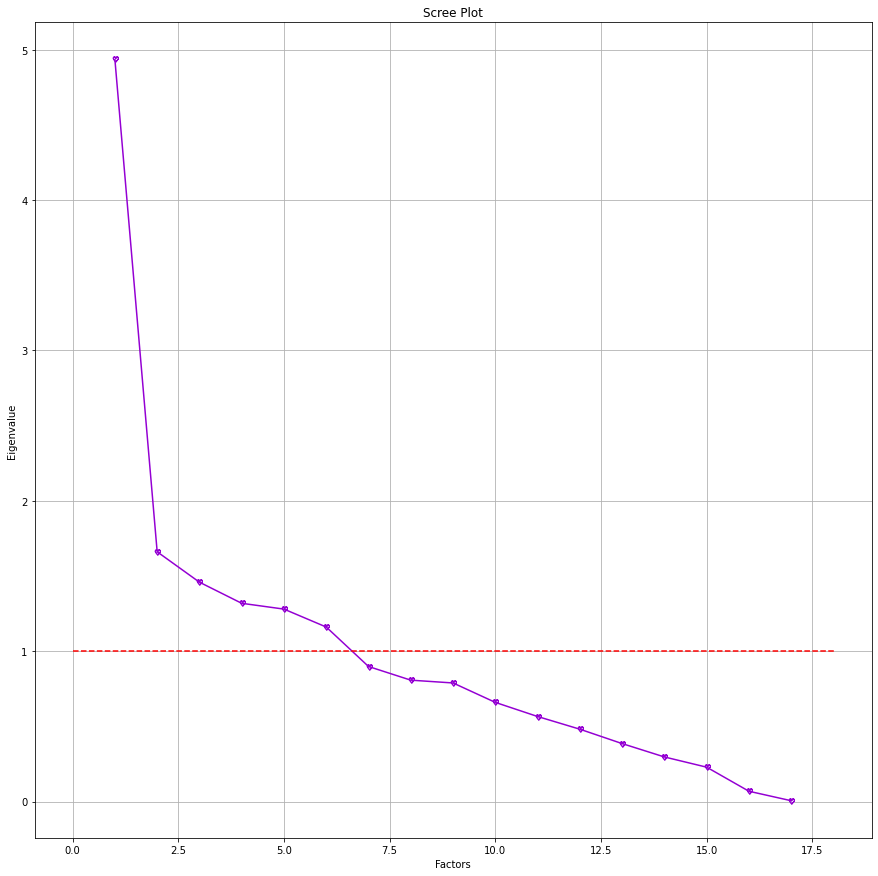

In [85]:
plt.plot(range(1,FIFA_data_dropped.shape[1]+1),ev,marker='$\heartsuit$', color ='darkviolet')
plt.plot([0,FIFA_data_dropped.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()
#ค่าจะตัด eigenvalue ที่ 1 ตัวไหนเกิน 1แสดงว่า eigenvalue มากกว่า 1สามารถ ใช้งานได้

In [75]:
data_fa[:,:6] #ดู6 ตัวแรก ที่มีค่ามากกว่า 1

array([[-5.11504620e-01, -2.91650655e-01,  1.80180850e+00,
         1.65769007e+00, -6.62598849e-01,  8.84775922e-01],
       [ 6.41389586e-01, -9.97682040e-01, -4.47442852e-01,
        -1.34252602e+00, -8.38082322e-01,  6.03457988e-01],
       [-6.60884782e-01, -5.40814119e-01, -8.46656045e-02,
        -4.12193135e-01, -7.84524430e-01,  2.69425466e-01],
       [ 5.14876754e-01, -8.61118072e-02, -1.57224595e+00,
        -8.19457469e-02,  2.13331150e-01,  1.32369138e-01],
       [ 1.20830901e+00, -8.24736040e-01,  1.90871893e+00,
         1.13142473e-02, -4.13569387e-02, -9.48154070e-02],
       [-1.03193387e+00, -6.06345795e-01,  3.22975009e-01,
        -4.32776934e-01, -8.31565401e-01, -7.97521037e-01],
       [-9.70398452e-01, -1.33458519e+00, -4.03875182e-02,
        -2.46975900e-01, -7.00468767e-01,  6.10894305e-01],
       [ 1.37268550e+00,  1.85731662e-01, -7.15113972e-01,
         8.03211488e-01, -3.89590662e-01,  3.76219793e-01],
       [ 3.15187468e-01, -5.05891877e-01,  6.661

In [76]:
fa.loadings_.shape

(17, 16)

รัน Factor Analysis อีกรอบด้วย parement เท่ากับ 6



In [77]:
from factor_analyzer import FactorAnalyzer 
fa2 = FactorAnalyzer(n_factors=6)
data_fa = fa2.fit_transform(FIFA_data_dropped)

In [78]:
fa2.loadings_.shape

(17, 6)

Plot factor loadings


In [79]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

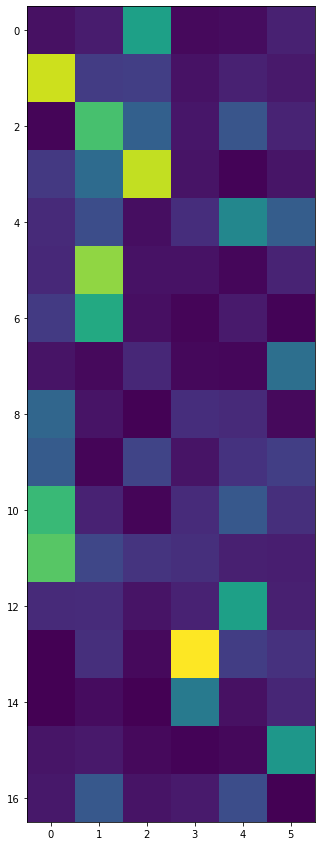

In [80]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(fa2.loadings_)) #ค่ามาก เป็นสีสว่าง  ส่วนค่าน้อย เป็นสีเข้ม

In [81]:
FIFA_data_dropped.columns

Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red'],
      dtype='object')

<BarContainer object of 17 artists>

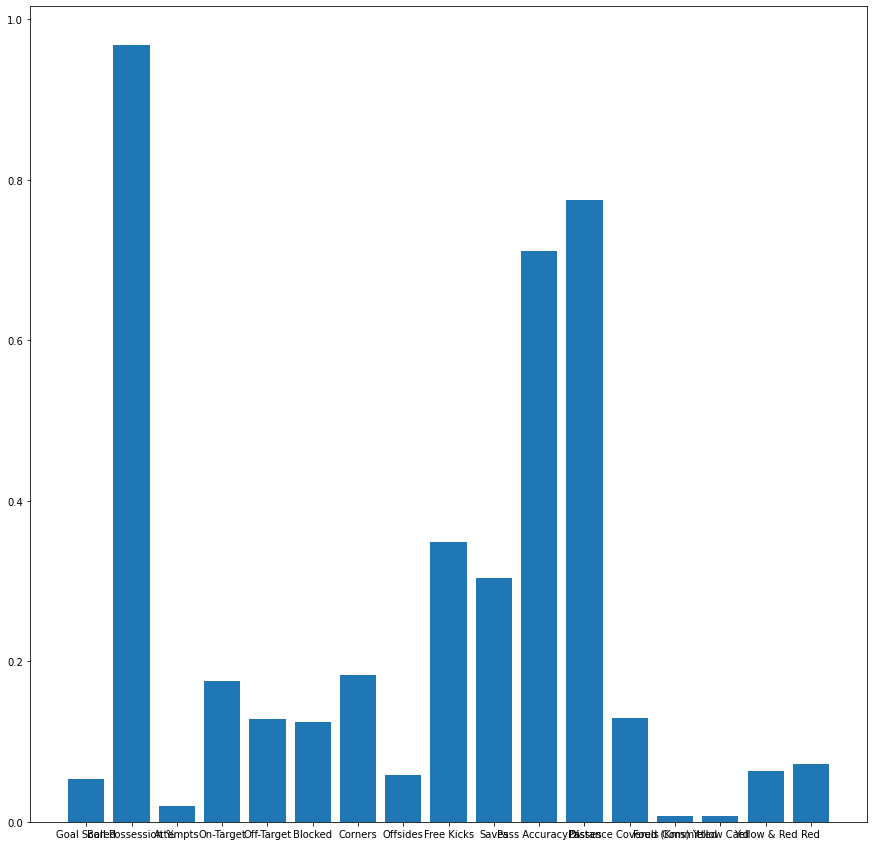

In [83]:
plt.bar(range(17),np.absolute(fa2.loadings_[:,0]),tick_label=FIFA_data_dropped.columns)

#การทำแบบกราฟแท่ง ทำให้ทราบว่าตัวแปรไหนอยู่กลุ่มเดียวกันบ้าง